# TXDELAY Transmit delays for a uniform linear array

TXDELAY returns the transmit time delays for focused, plane or circular beam patterns with a linear or convex array.
##Contents

1.    Syntax
1.    The structure PARAM
1.    Notes
1.    Uniform linear array (ULA)
1.    Diverging wave, plane wave, virtual source
1.    Example #1: Focused pressure field with a phased-array transducer
1.    Example #2: Diverging wave with a phased-array transducer
1.    Example #3: Plane wave with a linear array
1.    Example #4: Multi-line transmit (MLT) with a phased-array
1.    See also
1.    About the author
1.    Date modified



 Syntax

DELAYS = TXDELAY(X0,Z0,PARAM) returns the transmit time delays which must be used to generate a pressure field focused at the point (x0,z0). Note: If z0 is negative, then the point (x0,z0) is a virtual source (i.e. emission of circular waves). The properties of the medium and uniform linear array must be given in the structure PARAM (see below).

DELAYS = TXDELAY(PARAM,TILT) returns the transmit time delays which must be used to get a tilted plane wave. TILT is the tilt angle, i.e the angle between the emission axis and Z-vertical axis.

DELAYS = TXDELAY(PARAM,TILT,WIDTH) yields the transmit time delays necessary for creating a circular wave. The sector enclosed by the circular waves is characterized by the angular width and tilt. TILT represents the sector tilt, WIDTH is the sector width (both in radians). This option is not available for a convex array.

X0, Z0, TILT and WIDTH can be vectors. In that case, DELAYS is a matrix whose rows contain the different delay laws.

[DELAYS,PARAM] = TXDELAY(...) updates the PARAM structure parameters including the default values. PARAM will also include PARAM.TXdelay which is equal to DELAYS (in s).

[...] = TXDELAY (no input parameter) runs an interactive example simulating a focused pressure field generated by a 2.7 MHz phased array. The user must choose the focus position.

Units: X0 and Z0 must be in m; TILT and WIDTH must be in rad. DELAYS are in s.



## The structure PARAM

PARAM is a structure which must contain the following fields:

    PARAM.pitch: pitch of the linear array (in m, required)
    PARAM.Nelements: number of elements in the transducer array (required)
    PARAM.c: longitudinal velocity (in m/s, default = 1540 m/s)



## Notes

-    NOTE #1: X- and Z-axes

The X axis is PARALLEL to the transducer and points from the first (leftmost) element to the last (rightmost) element (X = 0 at the CENTER of the transducer).

The Z axis is PERPENDICULAR to the transducer and points downward (Z = 0 at the level of the transducer, Z increases as depth increases). See the figure below.

For a convex array, the X axis is parallel to the chord and Z = 0 at the level of the chord.


- NOTE #2: TILT angle

TILT describes the tilt angle in the trigonometric direction. See the second figure.


    NOTE #3: cardiac phased-array

A cardiac phased-array is also a uniform linear array!



## Uniform linear array (ULA)

The pitch is defined as the center-to-center distance between two adjacent elements. It is constant for a uniform linear array (ULA).



## Diverging wave, plane wave, virtual source

The two angles that define a diverging (circular) wave transmit are illustrated in the following figure.

${\beta}$ represents the width angle. ${\theta}$ is the tilt angle.

$L$ is the width of the array aperture, i.e. the center-to-center distance from the first to the last element of the linear array.

If the array has $N$ elements, and if $P$ stands for the pitch, then:

$$ L=(N-1)P. $$

The coordinates $(x_0,z_0)$ of the virtual source are given by:

$$ x_0 = \frac{-L}{2} \frac{\sin(2\theta)}{\sin(2\beta)}, \; z_0 = \frac{-L}{2} \frac{\cos(\beta)+\cos(2\theta)}{\sin(2\beta)}. $$

A diverging wave becomes a ${\theta}$-tilted plane wave when ${\beta}{\rightarrow}0^{+}$.



## Example #1: Focused pressure field with a phased-array transducer

This example shows how to generate the transmit delays to obtain a focused pressure field with a phased-array transducer.

Download the properties of a 2.7-MHz 64-element cardiac phased array in a structure param by using GETPARAM.


In [1]:
import pymust, numpy as np, matplotlib.pyplot as plt

In [2]:

param = pymust.getparam('P4-2v');



Choose a focus location at xf = 2 cm, zf = 5 cm.


In [3]:
xf = 2e-2; zf = 5e-2; # focus position (in m)

Obtain the corresponding transmit time delays (in s).

In [4]:
txdel = pymust.txdelay(xf,zf,param) # % in s

In [5]:
txdel.shape

(1, 64)


Display the transmit delays in microseconds.


Text(0.5, 1.0, 'TX delays for a field focused at $2.5$ cm')

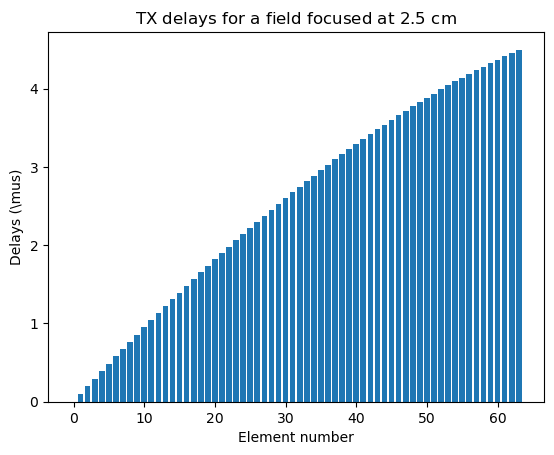

In [6]:
plt.bar(np.arange(txdel.shape[1]), txdel[0]*1e6)
plt.xlabel('Element number')
plt.ylabel('Delays (\mus)')
plt.title('TX delays for a field focused at $2.5$ cm')


Check the pressure field by using PFIELD.

First define an image grid.


In [7]:
x = np.linspace(-4e-2,4e-2,200); # in m
z = np.linspace(0,10e-2,200); # in m
x,z = np.meshgrid(x,z);
y = np.zeros_like(x);



The function PFIELD yields the root-mean-square (RMS) pressure field.


In [8]:
P, _, _ = pymust.pfield(x,y, z,txdel,param)



Display the acoustic pressure field.


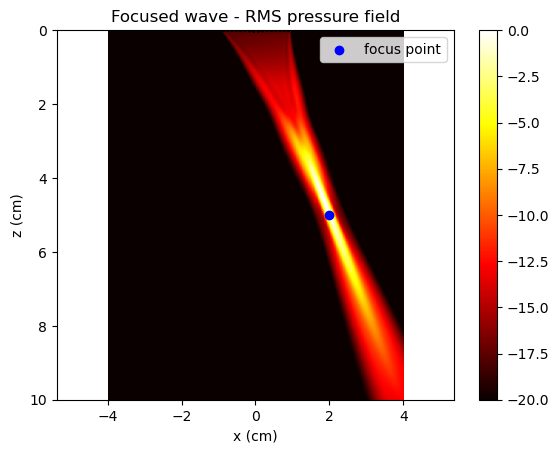

In [9]:

plt.imshow(20*np.log10(P/np.max(P)), extent = np.array([x[0,0], x[-1,0-1], z[-1,-1], z[0,0]])*1e2, cmap = 'hot')
plt.clim(-20, 0) #dynamic range = [-20,0] dB
plt.axis('equal')
c = plt.colorbar()
#c.YTickLabel{end} = '0 dB';

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('Focused wave - RMS pressure field')

plt.scatter(xf*1e2, zf*1e2, c = 'b', label = 'focus point')
plt.legend()


## Example #2: Diverging wave with a phased-array transducer

This example shows how to generate the transmit delays to obtain a diverging wave with a phased-array transducer.

Download the properties of a 2.7-MHz 64-element cardiac phased array in a structure param by using GETPARAM.


In [10]:

param = pymust.getparam('P4-2v');



Calculate the transmit delays to generate a 60-degrees wide circular wave steered at +10 degrees.


In [11]:
width = 60/180*np.pi # % width angle in rad
tilt = 10/180*np.pi # % tilt angle in rad
txdel = pymust.txdelay(param,tilt,width) # % in s


Display the delays.


Text(0.5, 1.0, 'TX delays for a 60{$\\circ$}-wide +10{$\\circ$}-tilted wave')

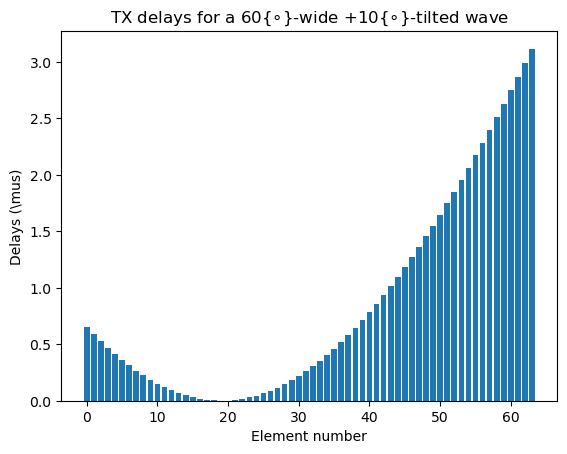

In [12]:
plt.bar(np.arange(txdel.shape[1]), txdel[0]*1e6)
plt.xlabel('Element number')
plt.ylabel('Delays (\mus)')
plt.title('TX delays for a 60{$\circ$}-wide +10{$\circ$}-tilted wave')



Alternatively, the transmit delays can also be calculated by defining a virtual source.


In [13]:
p = param.pitch; # pitch (in m)
L = (param.Nelements-1)*p; # array width (in m)
x0 = -L/2*np.sin(2*tilt)/np.sin(2*width); # in m
z0 = -L/2*(np.cos(width)+np.cos(2*tilt))/np.sin(2*width); # in m
txdel = pymust.txdelay(x0,z0,param); # in s


Text(0.5, 1.0, 'TX delays for a virtual source at {0.37,-1.57} cm')

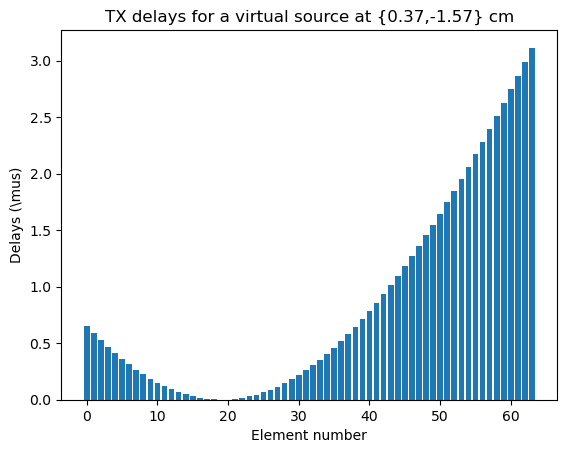

In [14]:
plt.bar(np.arange(txdel.shape[1]), txdel[0]*1e6)
plt.xlabel('Element number')
plt.ylabel('Delays (\mus)')

plt.title('TX delays for a virtual source at {0.37,-1.57} cm')



Display the resulting pressure field by using PFIELD.

First define the image grid.



In [15]:
x = np.linspace(-4e-2,4e-2,200); # in m
z = np.linspace(0,10e-2,200); # in m
x,z = np.meshgrid(x,z)
y = np.zeros_like(x)


The function PFIELD yields the root-mean-square (RMS) pressure field.


In [16]:
P, _, _ = pymust.pfield(x,y, z,txdel,param);


Display the acoustic pressure field.


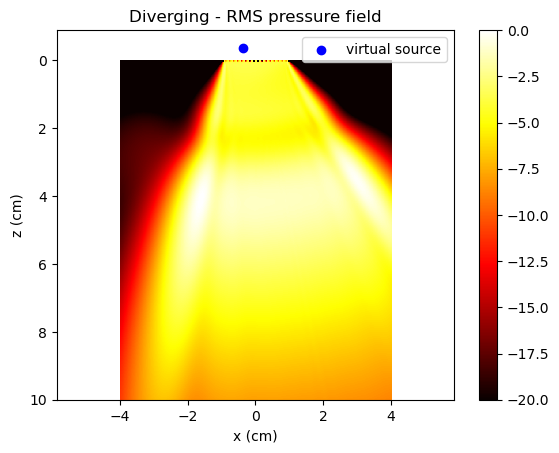

In [17]:
plt.imshow(20*np.log10(P/np.max(P)), extent = np.array([x[0,0], x[-1,0-1], z[-1,-1], z[0,0]])*1e2, cmap = 'hot')
plt.clim(-20, 0) #dynamic range = [-20,0] dB
plt.axis('equal')
c = plt.colorbar()
#c.YTickLabel{end} = '0 dB';

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('Diverging - RMS pressure field')

plt.scatter(x0*1e2, x0*1e2, c = 'b', label = 'virtual source')
plt.legend()


## Example #3: Plane wave with a linear array

This example shows how to generate the transmit delays to obtain a plane wave with a linear transducer.

Download the properties of a 7.6-MHz 128-element uniform linear array in a structure param by using GETPARAM.


In [18]:
param = pymust.getparam('L11-5v');



Calculate the transmit delays for a plane wave steered at +10 degrees


In [19]:
tilt = 10/180*np.pi; # tilt angle in rad
txdel = pymust.txdelay(param,tilt); # in s



Display the transmit delays.


Text(0.5, 1.0, 'TX delays for a +10${\\circ}$-tilted plane wave')

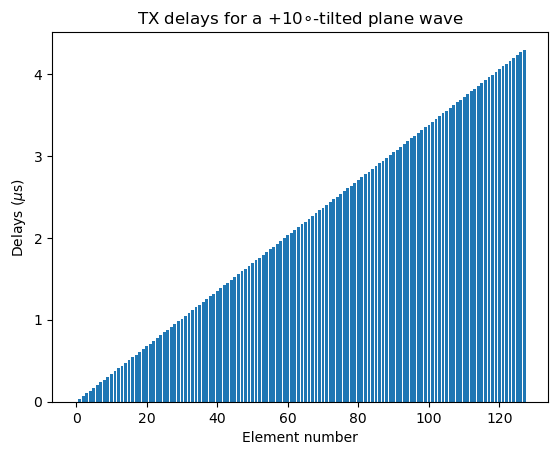

In [20]:
plt.bar(np.arange(txdel.shape[1]), txdel[0]*1e6)
plt.xlabel('Element number')
plt.ylabel('Delays ($\mu$s)')
plt.title('TX delays for a +10${\circ}$-tilted plane wave')



Use PFIELD to simulate the pressure field.

First define the image grid.


In [86]:
x = np.linspace(-5e-2,5e-2,200); # in m
z = np.linspace(0,5e-2,150); # in m
x,z = np.meshgrid(x,z);
y = np.zeros(x.shape);


The function PFIELD yields the root-mean-square (RMS) pressure field. To make the simulations faster, the number of subelements is set to 1 in the structure options. See pfield documentation for more details. This will have (small) effects in the very near field.


In [87]:
options = pymust.utils.Options();
options.ElementSplitting = 1;
P,_, _ = pymust.pfield(x,y,z,txdel,param,options);


Display the RMS acoustic pressure field.


Text(0.5, 1.0, 'Plane wave - RMS pressure field')

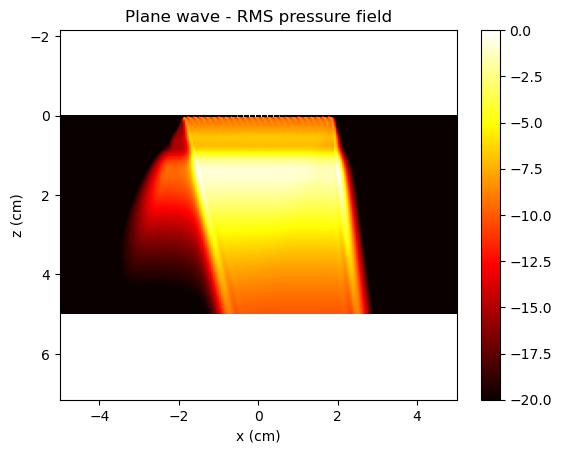

In [23]:

plt.imshow(20*np.log10(P/np.max(P)), extent = np.array([x[0,0], x[-1,0-1], z[-1,-1], z[0,0]])*1e2, cmap = 'hot')
plt.clim(-20, 0) #dynamic range = [-20,0] dB
plt.axis('equal')
c = plt.colorbar()
#c.YTickLabel{end} = '0 dB';

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('Plane wave - RMS pressure field')



## Example #4: Multi-line transmit (MLT) with a phased-array

This example shows how to generate a MLT transmit sequence with a phased-array transducer. In this example, a 3-MLT sequence is designed, i.e. three focused waves are transmitted simultaneously.

Download the properties of a 2.7-MHz 64-element cardiac phased array in a structure param with GETPARAM.


In [24]:

param = pymust.getparam('P4-2v');



Define the TX delays for a 3-MLT transmit sequence.



In [31]:

x0 = 2e-2 # in m
z0 = 5e-2; # in m
xf = np.array([-x0, 0, x0])
zf = np.array([z0, np.sqrt(x0**2+z0**2), z0])#  % focus points (in m)
txdel = pymust.txdelay(xf,zf,param)#; % in s



Display the transmit delays.


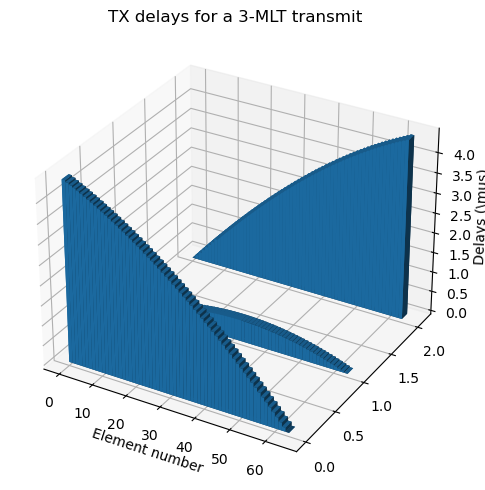

In [84]:

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111, projection='3d')
x, y  = np.meshgrid(np.arange(txdel.shape[1]), np.arange(txdel.shape[0]))
width = 1
depth = .1
bottom = np.zeros_like(x)
ax1.bar3d(x.flatten(), y.flatten(), bottom.flatten(), width, depth, txdel.flatten(), shade=True)
plt.xlabel('Element number')
ax1.set_zlabel('Delays (\mus)')
plt.title('TX delays for a 3-MLT transmit')
ax1.zaxis.labelpad=.001
plt.tight_layout()




Display the pressure field by using PFIELD.


In [27]:

x = np.linspace(-5e-2,5e-2,200); # in m
z = np.linspace(0,10e-2,200); # in m
x,z = np.meshgrid(x,z); # image grid
y = np.zeros(x.shape);


In [28]:

P, _, _ = pymust.pfield(x,y,z,txdel,param)# % pressure field


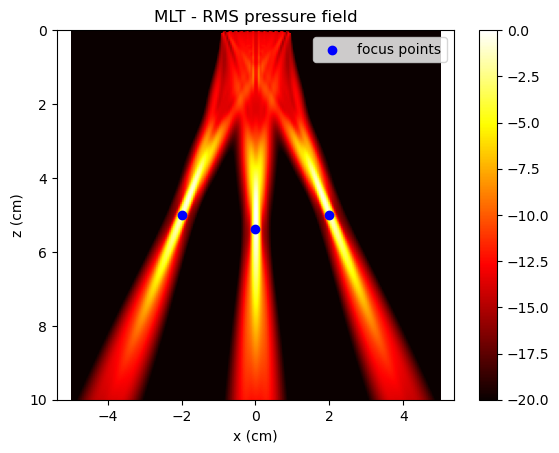

In [32]:

plt.imshow(20*np.log10(P/np.max(P)), extent = np.array([x[0,0], x[-1,0-1], z[-1,-1], z[0,0]])*1e2, cmap = 'hot')
plt.clim(-20, 0) #dynamic range = [-20,0] dB
plt.axis('equal')
c = plt.colorbar()
#c.YTickLabel{end} = '0 dB';

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('MLT - RMS pressure field')

plt.scatter(xf*1e2,zf*1e2, c ='b', label = 'focus points')
plt.legend()